In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel("/content/drive/MyDrive/ExcelData/train.xlsx")
df1 = pd.read_excel("/content/drive/MyDrive/ExcelData/test.xlsx")

Mounted at /content/drive


Accuracy for SVM is: 99.76019184652279
Confusion Matrix:


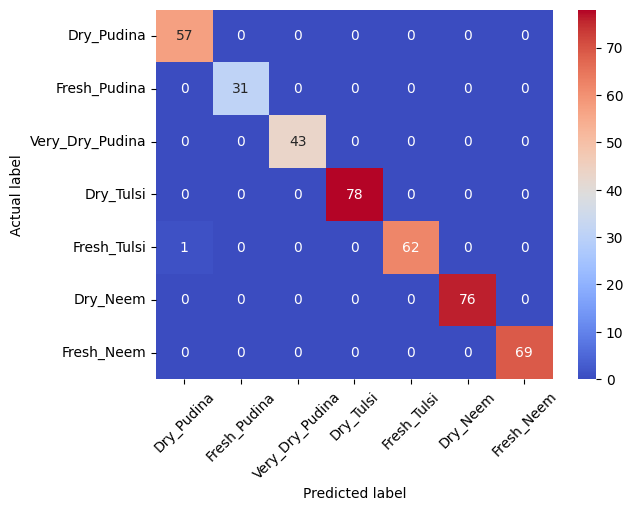

[0.93489149 0.95826377 0.93823038]
Avg : 0.9437952142459656
Time Taken: 0.7035913580000397 sec


In [2]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pickle
# from pretty_confusion_matrix import pp_matrix
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import time
import seaborn as sns


# Extract the hyperspectral data (excluding the last column) and labels (last column)
hyperspectral_data = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values
# print(set(labels))

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

X = hyperspectral_data
Y = encoded_labels

digits = load_digits()

# Splitting the data test into train 70% and test 30%.
# x_train, y_train are training data and labels respectively
# x_test, y_test are testing data and labels respectively
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=4)

start = time.perf_counter()

# Making the SVM Classifer
Classifier = SVC(kernel="linear")

# Training the model on the training data and labels
Classifier.fit(x_train, y_train)

end = time.perf_counter()

# Using the model to predict the labels of the test data
y_pred = Classifier.predict(x_test)

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for SVM is:",accuracy)

# Beautiful Confusion Matrix
y_test = label_encoder.inverse_transform(y_test)
y_pred = label_encoder.inverse_transform(y_pred)
lb = ['Dry_Pudina', 'Fresh_Pudina', 'Very_Dry_Pudina', 'Dry_Tulsi', 'Fresh_Tulsi', 'Dry_Neem', 'Fresh_Neem']
confusion_mat = confusion_matrix(y_test,y_pred, labels=lb)
print("Confusion Matrix:")
sns.heatmap(
    confusion_mat,
    annot=True,
    fmt="d",
    cmap="coolwarm",
    xticklabels=lb,
    yticklabels=lb,
)
plt.xticks(rotation=45)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

# Save the trained classifier for future use
pickle.dump(Classifier, open("cls.sav", "wb"))

#k-fold cross validation (k = 3)
score_svm =cross_val_score(SVC(kernel="linear"), digits.data, digits.target,cv=3)
print(score_svm)
print("Avg :",np.average(score_svm))

#Time Calculation
print('Time Taken:', end-start, 'sec')

In [3]:
import pickle

classifier = pickle.load(open("cls.sav", "rb"))

# Importing the dataset from the sklearn library into a local variable called dataset

# Extract the hyperspectral data (excluding the last column) and labels (last column)
hyperspectral_data1 = df1.iloc[:, :-1].values
labels1 = df1.iloc[:, -1].values
print("labels1 : ",labels1)

new_pred = classifier.predict(hyperspectral_data1)
decoded_predictions = label_encoder.inverse_transform(new_pred)
print("Predictions:", decoded_predictions)

labels1 :  ['Dry_Pudina' 'Dry_Pudina' 'Dry_Pudina' 'Dry_Pudina' 'Dry_Pudina'
 'Dry_Pudina' 'Dry_Pudina' 'Dry_Pudina' 'Dry_Pudina' 'Dry_Pudina'
 'Dry_Pudina' 'Dry_Pudina' 'Dry_Pudina' 'Dry_Pudina' 'Dry_Pudina'
 'Dry_Pudina' 'Fresh_Pudina' 'Fresh_Pudina' 'Fresh_Pudina' 'Fresh_Pudina'
 'Fresh_Pudina' 'Fresh_Pudina' 'Fresh_Pudina' 'Fresh_Pudina'
 'Fresh_Pudina' 'Fresh_Pudina' 'Fresh_Pudina' 'Fresh_Pudina'
 'Fresh_Pudina' 'Fresh_Pudina' 'Fresh_Pudina' 'Fresh_Pudina'
 'Very_Dry_Pudina' 'Very_Dry_Pudina' 'Very_Dry_Pudina' 'Very_Dry_Pudina'
 'Very_Dry_Pudina' 'Very_Dry_Pudina' 'Very_Dry_Pudina' 'Very_Dry_Pudina'
 'Very_Dry_Pudina' 'Very_Dry_Pudina' 'Very_Dry_Pudina' 'Very_Dry_Pudina'
 'Very_Dry_Pudina' 'Very_Dry_Pudina' 'Very_Dry_Pudina' 'Very_Dry_Pudina'
 'Very_Dry_Pudina' 'Very_Dry_Pudina' 'Very_Dry_Pudina' 'Dry_Tulsi'
 'Dry_Tulsi' 'Dry_Tulsi' 'Dry_Tulsi' 'Dry_Tulsi' 'Dry_Tulsi' 'Dry_Tulsi'
 'Dry_Tulsi' 'Dry_Tulsi' 'Dry_Tulsi' 'Dry_Tulsi' 'Dry_Tulsi' 'Dry_Tulsi'
 'Dry_Tulsi' 'Dry_Tulsi' 'Dry

In [4]:
print(lb)

['Dry_Pudina', 'Fresh_Pudina', 'Very_Dry_Pudina', 'Dry_Tulsi', 'Fresh_Tulsi', 'Dry_Neem', 'Fresh_Neem']
